In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

# Nhập dữ liệu

In [2]:
train = pd.read_csv(r'D:\Documents\Đồ án tốt nghiệp\Mobile-pricing\Data\Samsung_mobile.csv')

In [3]:
train.head()

,Mobile_Phone,Model,RAM_GB,ROM_GB,Review,Latest_Price_Taka,Payment_Method,Discount,Selling_Price
0,Samsumg Galaxy,Note 20 ultra,8,256,good,134999.0,cash,3000,131999
1,Samsumg Galaxy,S20 ultra,12,128,good,129900.0,cash,3000,126900
2,Samsumg Galaxy,S20+,8,128,good,84999.0,cash,3000,81999
3,Samsumg Galaxy,Lite,6,128,good,55999.0,cash,2500,53499
4,Samsumg Galaxy,A51,6,128,good,45990.0,cash,2500,43490


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
Mobile_Phone         21 non-null object
Model                21 non-null object
RAM_GB               21 non-null int64
ROM_GB               21 non-null int64
Review               21 non-null object
Latest_Price_Taka    21 non-null float64
Payment_Method       21 non-null object
Discount             21 non-null int64
Selling_Price        21 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.6+ KB


In [5]:
train.shape

(21, 9)

In [6]:
feature_category = train.select_dtypes(include=['object'])
feature_numerical = train.select_dtypes(exclude=['object'])
y = feature_numerical['Selling_Price'].values
feature_numerical.drop(['Selling_Price'], axis=1, inplace=True)
train.drop(['Selling_Price'], axis=1, inplace=True)

C:\Users\MANHLK\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
def analysis_feature_category(feature_name):
    train[feature_name].value_counts()
    label = list(train[feature_name].value_counts().index)
    value = train[feature_name].value_counts().values
    index = np.arange(len(label))
    plt.figure(figsize=(15,5))
    plt.suptitle(feature_name, fontsize=15, fontweight='bold')
    # Bar chart
    plt.subplot(1,2,1)
    plt.xticks(index, label)
    plt.ylabel('Số bản ghi')
    plt.bar(index, value, width=.5)
    for x, y in zip(index, value):
        plt.text(x,y, str(y))
    # Pie chart
    plt.subplot(1,2,2)
    plt.pie(value, labels=label, autopct='%.2f%%')

In [8]:
def analysis_feature_numerical(feature_name):
    x = train[feature_name].values
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    fig.suptitle(feature_name, fontsize=15, fontweight='bold')
    axs[0].set_ylabel('Density')
    sns.distplot(x, kde=True, hist=True, ax=axs[0])
    plt.xlabel('value')
    plt.ylabel('Selling Price')
    plt.plot(x,y,'bo')

## Feature dữ liệu categorical

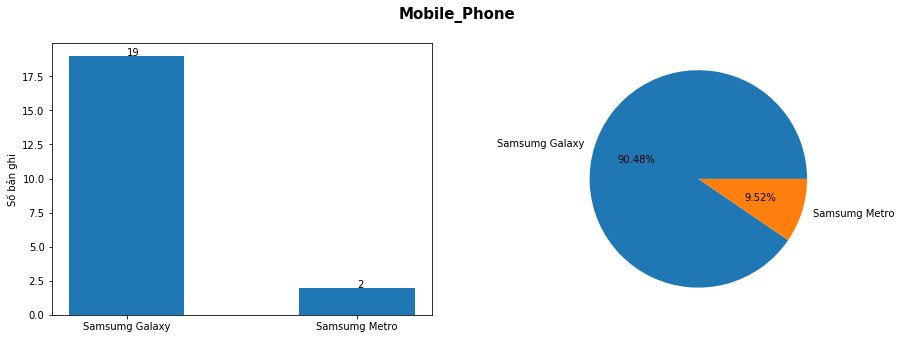

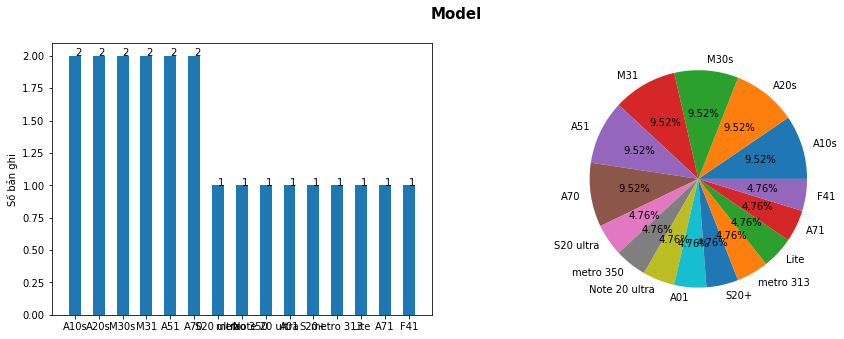

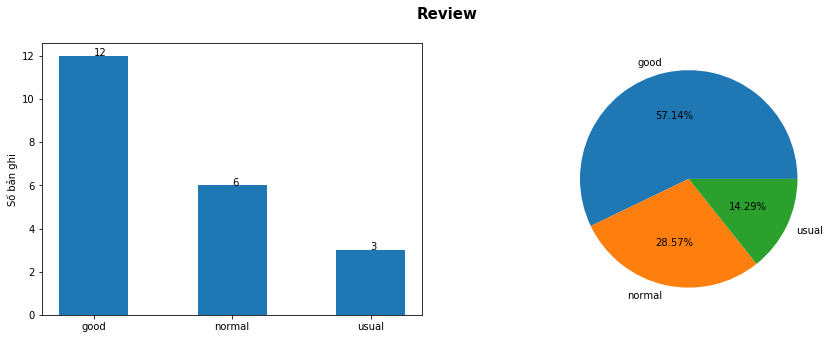

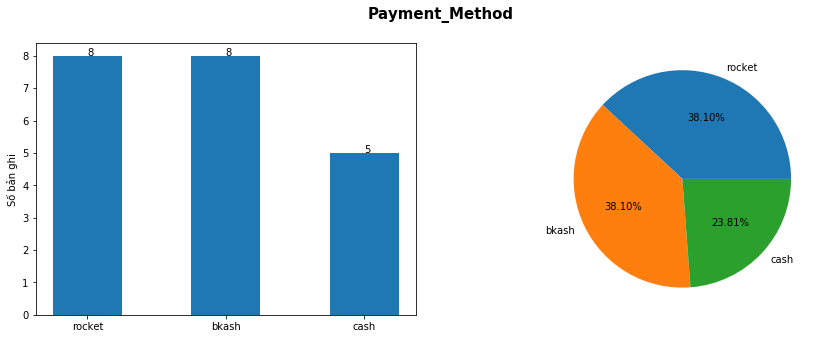

In [9]:
for feature in feature_category:
    analysis_feature_category(feature)

## Feature dạng numerical

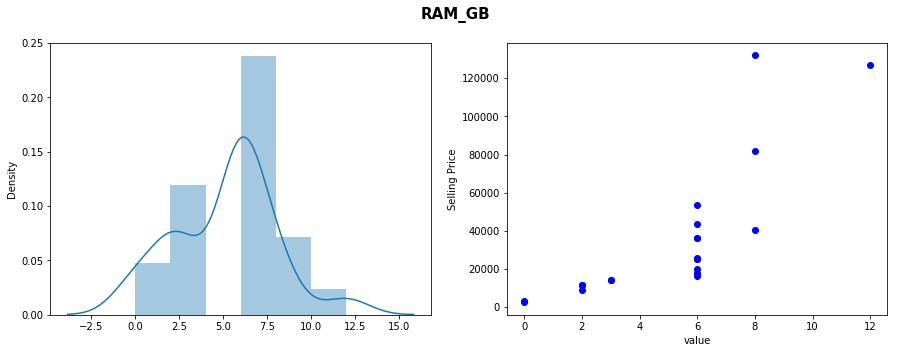

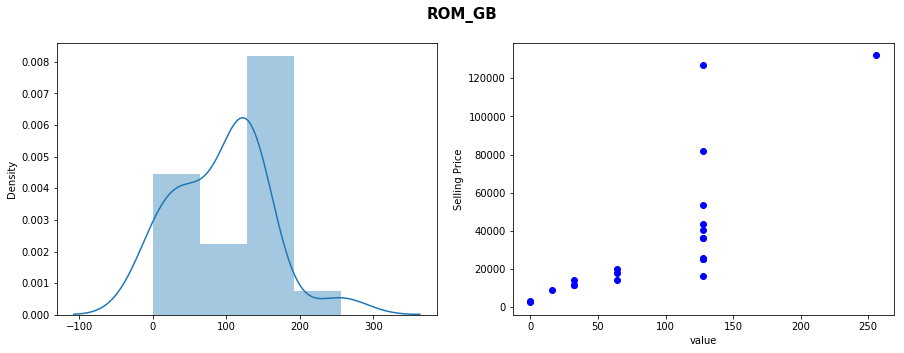

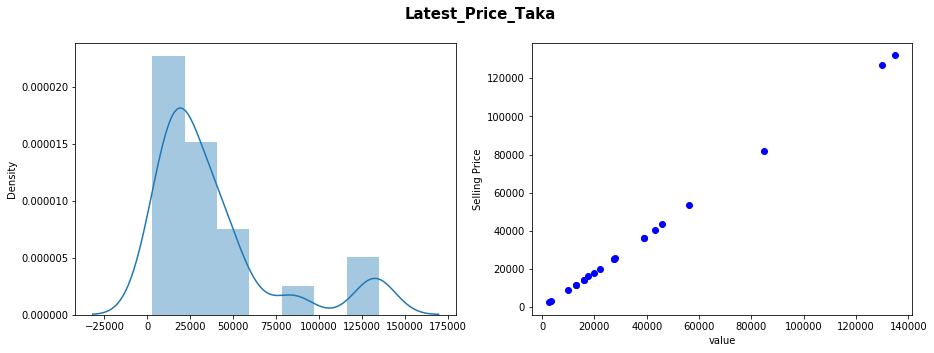

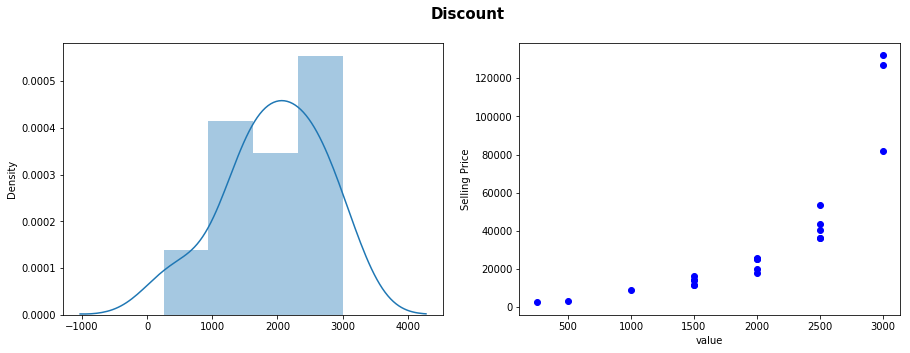

In [10]:
for feature in feature_numerical:
    analysis_feature_numerical(feature)

# Encoding and Normalization

## Encoding - One hot Vector

In [11]:
for feature in feature_category:
    encoder = pd.get_dummies(train[feature], prefix=feature)
    train.drop([feature], axis=1, inplace=True)
    train = pd.concat([train, encoder], axis=1)

In [12]:
train.head()

,RAM_GB,ROM_GB,Latest_Price_Taka,Discount,Mobile_Phone_Samsumg Galaxy,Mobile_Phone_Samsumg Metro,Model_A01,Model_A10s,Model_A20s,Model_A51,Model_A70,Model_A71,Model_F41,Model_Lite,Model_M30s,Model_M31,Model_Note 20 ultra,Model_S20 ultra,Model_S20+,Model_metro 313,Model_metro 350,Review_good,Review_normal,Review_usual,Payment_Method_bkash,Payment_Method_cash,Payment_Method_rocket
0,8,256,134999.0,3000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,12,128,129900.0,3000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,8,128,84999.0,3000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,6,128,55999.0,2500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,6,128,45990.0,2500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [13]:
train.shape

(21, 27)

## Normalization

In [14]:
for feature in feature_numerical:
    mean = train[feature].mean()
    std  = train[feature].std()
    train[feature] = train[feature].apply(lambda x: (x-mean)/std)

In [15]:
train.head()

,RAM_GB,ROM_GB,Latest_Price_Taka,Discount,Mobile_Phone_Samsumg Galaxy,Mobile_Phone_Samsumg Metro,Model_A01,Model_A10s,Model_A20s,Model_A51,Model_A70,Model_A71,Model_F41,Model_Lite,Model_M30s,Model_M31,Model_Note 20 ultra,Model_S20 ultra,Model_S20+,Model_metro 313,Model_metro 350,Review_good,Review_normal,Review_usual,Payment_Method_bkash,Payment_Method_cash,Payment_Method_rocket
0,0.978349,2.616384,2.639839,1.383015,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,2.348038,0.552757,2.501623,1.383015,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0.978349,0.552757,1.284519,1.383015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,0.293505,0.552757,0.498434,0.730356,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.293505,0.552757,0.227126,0.730356,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Xây dựng các model hồi quy